In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("bikes_rent.csv")
print(df.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


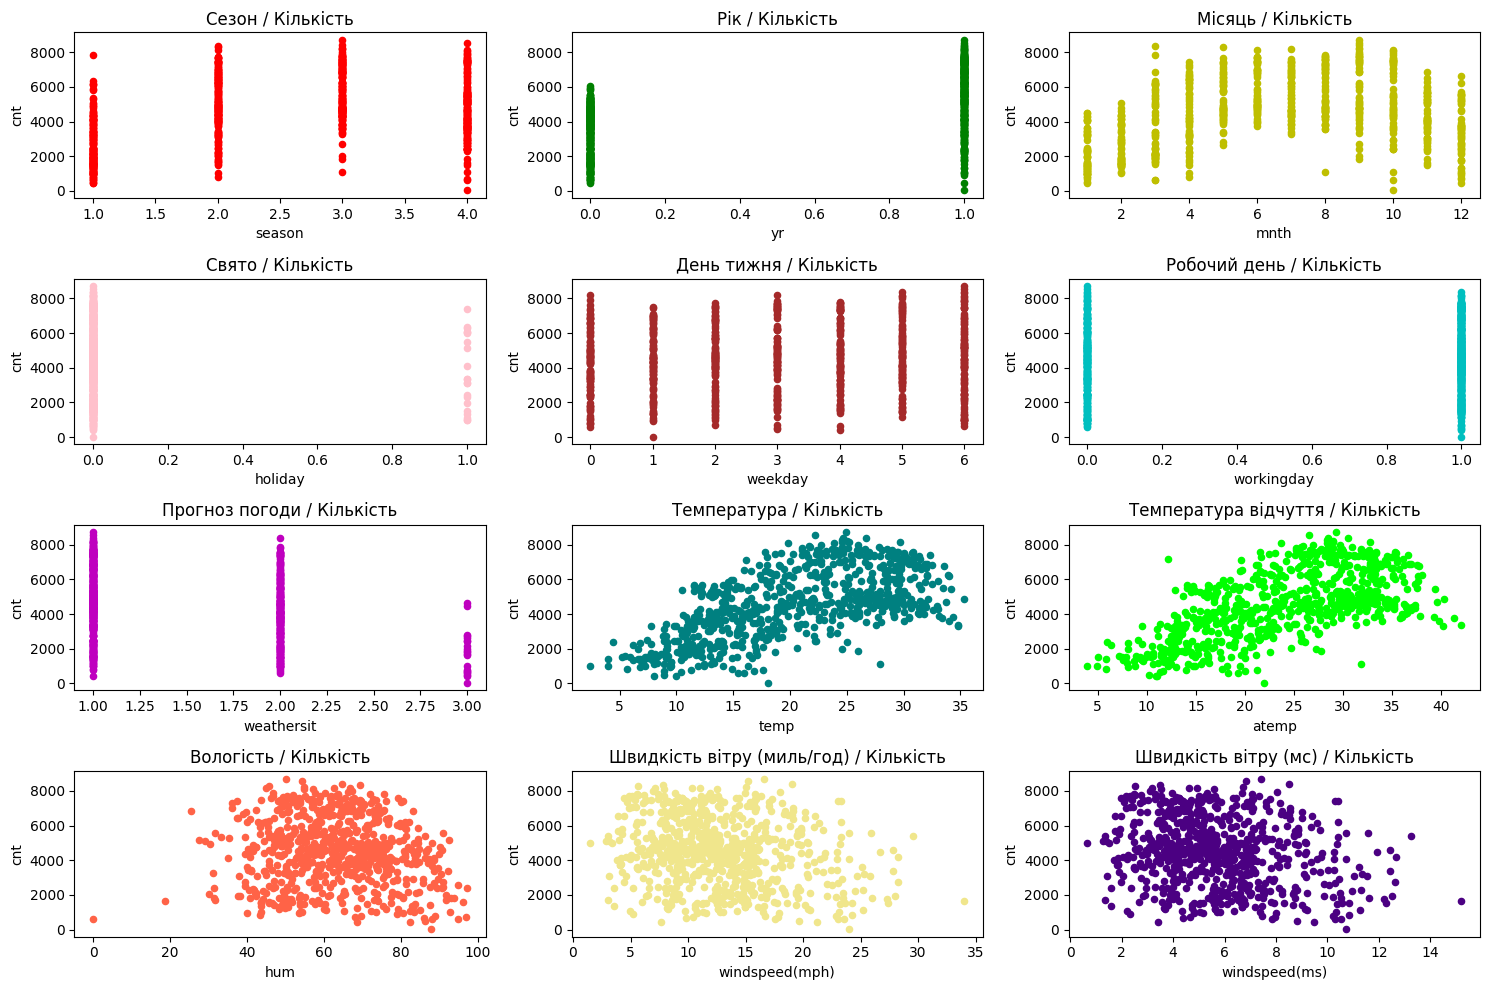

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
df.plot(kind='scatter', x='season', y='cnt', color='r', ax=axes[0, 0])
df.plot(kind='scatter', x='yr', y='cnt', color='g', ax=axes[0, 1])
df.plot(kind='scatter', x='mnth', y='cnt', color='y', ax=axes[0, 2])
df.plot(kind='scatter', x='holiday', y='cnt', color='pink', ax=axes[1, 0])
df.plot(kind='scatter', x='weekday', y='cnt', color='brown', ax=axes[1, 1])
df.plot(kind='scatter', x='workingday', y='cnt', color='c', ax=axes[1, 2])
df.plot(kind='scatter', x='weathersit', y='cnt', color='m', ax=axes[2, 0])
df.plot(kind='scatter', x='temp', y='cnt', color='teal', ax=axes[2, 1])
df.plot(kind='scatter', x='atemp', y='cnt', color='lime', ax=axes[2, 2])
df.plot(kind='scatter', x='hum', y='cnt', color='tomato', ax=axes[3, 0])
df.plot(kind='scatter', x='windspeed(mph)', color='khaki', y='cnt', ax=axes[3, 1])
df.plot(kind='scatter', x='windspeed(ms)', y='cnt', color='indigo', ax=axes[3, 2])
axes[0, 0].set_title('Сезон / Кількість')
axes[0, 1].set_title('Рік / Кількість')
axes[0, 2].set_title('Місяць / Кількість')
axes[1, 0].set_title('Свято / Кількість')
axes[1, 1].set_title('День тижня / Кількість')
axes[1, 2].set_title('Робочий день / Кількість')
axes[2, 0].set_title('Прогноз погоди / Кількість')
axes[2, 1].set_title('Температура / Кількість')
axes[2, 2].set_title('Температура відчуття / Кількість')
axes[3, 0].set_title('Вологість / Кількість')
axes[3, 1].set_title('Швидкість вітру (миль/год) / Кількість')
axes[3, 2].set_title('Швидкість вітру (мс) / Кількість')
plt.tight_layout()
plt.show()

• Зв'язок між кількістю прокатів та місяцем є мнозначним. З аналізу графіка "Місяць / Кількість" видно, що ця залежність має характер сезонної кривої. Влітку кількість прокатів різко зростає, а взимку вона зменшується, що вказує на наявність сезонних коливань. Таким чином, залежність між місяцем і кількістю прокатів не є прямолінійною, а скоріше нагадує криву.

• Серед ознак, які, ймовірно, мають лінійний вплив на кількість прокатів, можна відзначити температуру (temp) і температуру за відчуттям (atemp). З аналізу графіків "Температура / Кількість" і "Температура відчуття / Кількість" видно, що зазвичай кількість прокатів збільшується із зростанням температури. Цей зв'язок може бути лінійним, оскільки існує загальна тенденція до збільшення кількості прокатів із підвищенням температури.

In [6]:
correlations = df.iloc[:, :-1].corrwith(df['cnt'])
print(correlations)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64


In [7]:
correlations = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].corr()
print(correlations)

                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


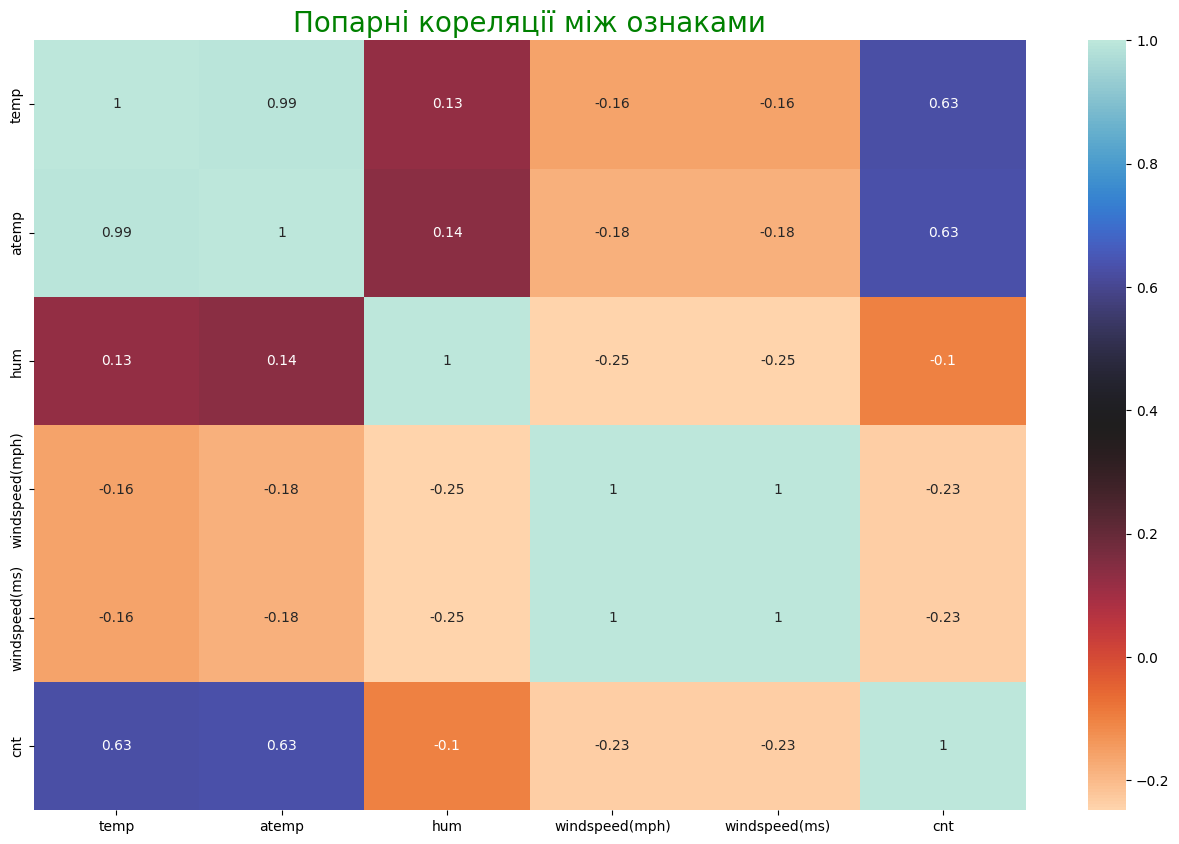

In [8]:
plt.rcParams["figure.figsize"] = (16, 10)
sns.heatmap(df.iloc[:, 7:].corr(), annot=True, cmap='icefire_r')
plt.title('Попарні кореляції між ознаками', fontsize=20, color='g')
plt.show()

In [9]:
mean_features = df.mean()
print(mean_features)

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64


In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X = df.drop(columns=['cnt'])
y = df['cnt']
regressor.fit(X, y)
feature_names = df.columns[:-1]
coefficients = regressor.coef_
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

season: 514.2746214222318
yr: 2043.9347266992577
mnth: -40.962732189660954
holiday: -519.3787167507071
weekday: 68.4951552637936
workingday: 121.29315570904183
weathersit: -606.4507641729948
temp: 48.994375424169846
atemp: 71.91595392715395
hum: -10.230792196371253
windspeed(mph): 2400962890715.9336
windspeed(ms): -5370953986616.345


In [11]:
from sklearn.linear_model import Ridge
ridge_regressor = Ridge()
ridge_regressor.fit(X, y)
ridge_coefficients = ridge_regressor.coef_
print("Ridge регресор:")
for feature, coefficient in zip(feature_names, ridge_coefficients):
    print(f"{feature}: {coefficient}")

Ridge регресор:
season: 507.80188185058074
yr: 2029.0890541970439
mnth: -38.47089727912564
holiday: -493.27801548382047
weekday: 69.1139696516594
workingday: 121.52442502929462
weathersit: -605.2055553731518
temp: 49.31676759599553
atemp: 71.78598727333807
hum: -10.383394500484659
windspeed(mph): -31.9355016942903
windspeed(ms): -14.276040263830613


In [12]:
from sklearn.linear_model import Lasso
lasso_regressor = Lasso()
lasso_regressor.fit(X, y)
lasso_coefficients = lasso_regressor.coef_
print("Lasso регресор:")
for feature, coefficient in zip(feature_names, lasso_coefficients):
    print(f"{feature}: {coefficient}")

Lasso регресор:
season: 506.55127864980744
yr: 2036.2316676979033
mnth: -38.07827028932162
holiday: -484.65194618654084
weekday: 68.9383747913396
workingday: 118.44759758668353
weathersit: -604.5667118927045
temp: 51.36326058561641
atemp: 69.91273749012187
hum: -10.352705204636582
windspeed(mph): -38.34106761310848
windspeed(ms): -0.0


In [13]:
from sklearn.linear_model import Ridge
ridge_regressor = Ridge()
ridge_regressor.fit(X, y)
ridge_coefficients = ridge_regressor.coef_
print("Ridge регресор:")
for feature, coefficient in zip(feature_names, ridge_coefficients):
    print(f"{feature}: {coefficient}")

Ridge регресор:
season: 507.80188185058074
yr: 2029.0890541970439
mnth: -38.47089727912564
holiday: -493.27801548382047
weekday: 69.1139696516594
workingday: 121.52442502929462
weathersit: -605.2055553731518
temp: 49.31676759599553
atemp: 71.78598727333807
hum: -10.383394500484659
windspeed(mph): -31.9355016942903
windspeed(ms): -14.276040263830613


In [14]:
alphas = [0.1, 1, 10, 100, 1000]

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X, y)
    coefs_lasso.append(lasso_regressor.coef_)
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X, y)
    coefs_ridge.append(ridge_regressor.coef_)
coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

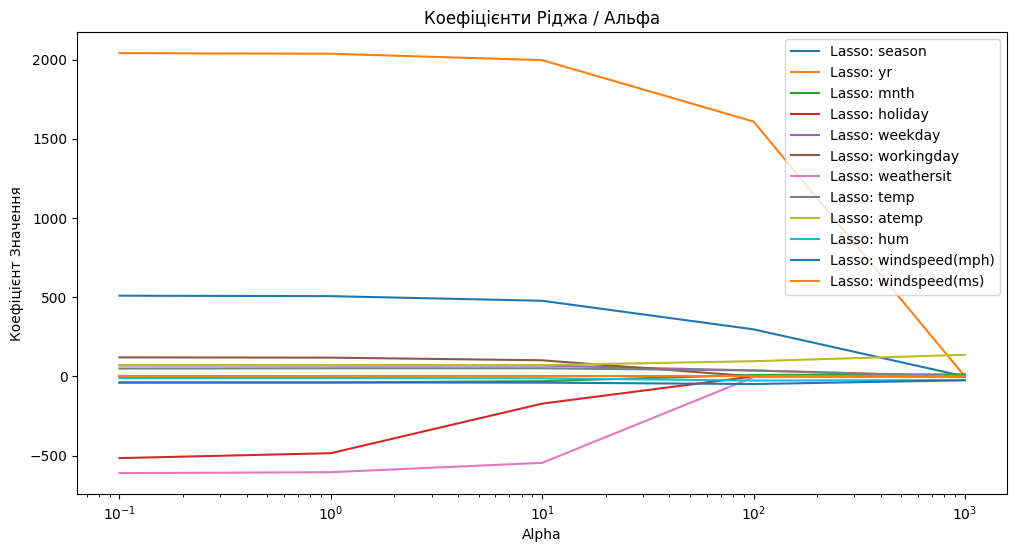

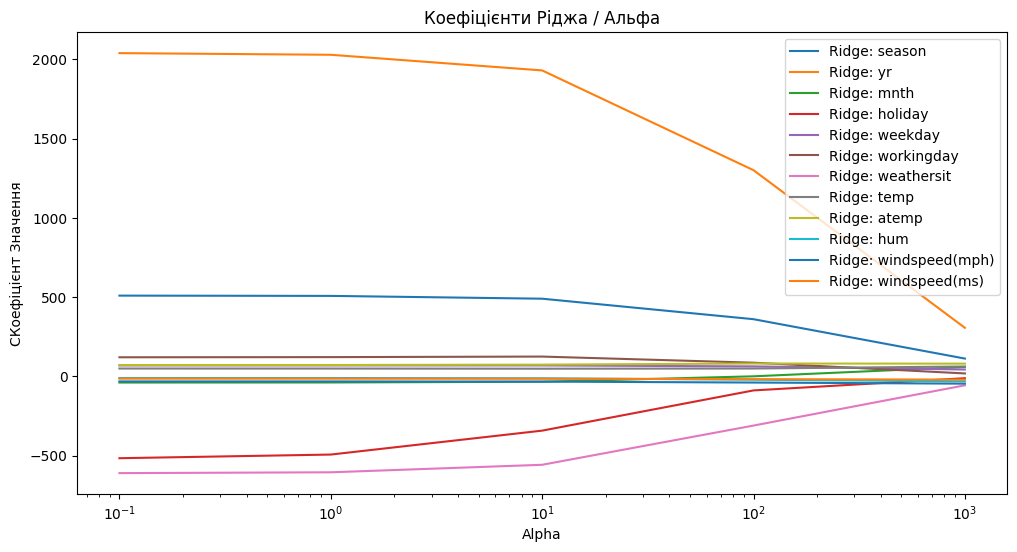

In [15]:
plt.figure(figsize=(12, 6))
for i in range(len(feature_names)):
    plt.plot(alphas, coefs_lasso[:, i], label=f"Lasso: {feature_names[i]}")

plt.xscale('log')
plt.title('Коефіцієнти Ріджа / Альфа')
plt.xlabel('Alpha')
plt.ylabel('Коефіцієнт Значення')
plt.legend()
plt.axis('tight')
plt.show()
plt.figure(figsize=(12, 6))
for i in range(len(feature_names)):
    plt.plot(alphas, coefs_ridge[:, i], label=f'Ridge: {feature_names[i]}')
plt.xscale('log')
plt.title('Коефіцієнти Ріджа / Альфа')
plt.xlabel('Alpha')
plt.ylabel('CКоефіцієнт Значення')
plt.legend()
plt.axis('tight')
plt.show()

Lasso регуляризатор:

• В порівнянні з Ridge, Lasso регуляризатор є більш агресивним у зменшенні ваг при тому самому значенні alpha. Це видно на графіках, де ваги для Lasso швидко зменшуються до нуля, у той час як для Ridge вони також зменшуються, але залишаються ненульовими, навіть при великих значеннях alpha.

• Lasso може виключати одну з ознак, таку як windspeed, при будь-якому значенні alpha > 0. Це відбувається через використання Lasso L1-регуляризації, яка має властивість встановлювати деякі ваги рівними нулю. У випадку Ridge, який використовує L2-регуляризацію, ознаки не виключаються повністю, вони просто мають дуже малі ваги.

• Lasso ефективний у відборі неінформативних ознак, оскільки він може встановлювати ваги рівними нулю. Це робить його корисним для відкидання ознак, які не вносять суттєвого впливу в модель. З іншого боку, Ridge зменшує ваги, але не виключає ознаки повністю, тому він менш ефективний у відборі неінформативних ознак.

• При дуже великих значеннях alpha для Lasso всі ваги зменшуються до нуля. Це відбувається через використання L1-регуляризації, яка штрафує модель за великі значення ваг шляхом додавання модулів ваг до функції втрат. При великих значеннях alpha цей штраф стає дуже великим, і модель стає простіше, зводячи всі ваги до нуля.


Найкраще alpha: 1.0


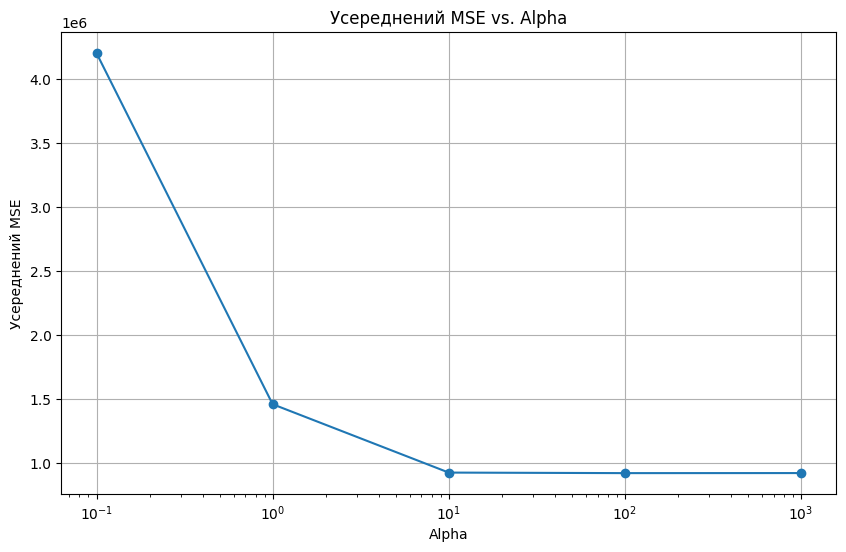

Навчені ваги:
season: 506.55127864980744
yr: 2036.2316676979033
mnth: -38.07827028932162
holiday: -484.65194618654084
weekday: 68.9383747913396
workingday: 118.44759758668353
weathersit: -604.5667118927045
temp: 51.36326058561641
atemp: 69.91273749012187
hum: -10.352705204636582
windspeed(mph): -38.34106761310848
windspeed(ms): -0.0


In [16]:
from sklearn.linear_model import LassoCV

alphas = [0.1, 1, 10, 100, 1000]
lasso_cv_regressor = LassoCV(alphas=alphas, cv=3)
lasso_cv_regressor.fit(X, y)
best_alpha = lasso_cv_regressor.alpha_
print(f"Найкраще alpha: {best_alpha}")
mse_path = lasso_cv_regressor.mse_path_.mean(axis=1)
def create_plot(alphas, mse, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, mse, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xscale('log')
    plt.grid()
    plt.show()
create_plot(alphas, mse_path, "Усереднений MSE vs. Alpha", "Alpha", "Усереднений MSE")
lasso_cv_coefs = lasso_cv_regressor.coef_
print("Навчені ваги:")
for feature, coefficient in zip(feature_names, lasso_cv_coefs):
    print(f"{feature}: {coefficient}")

Значення alpha, що відповідають мінімумам MSE на кожному розбитті:
Розбиття 1: 0.1
Розбиття 2: 100.0
Розбиття 3: 0.1


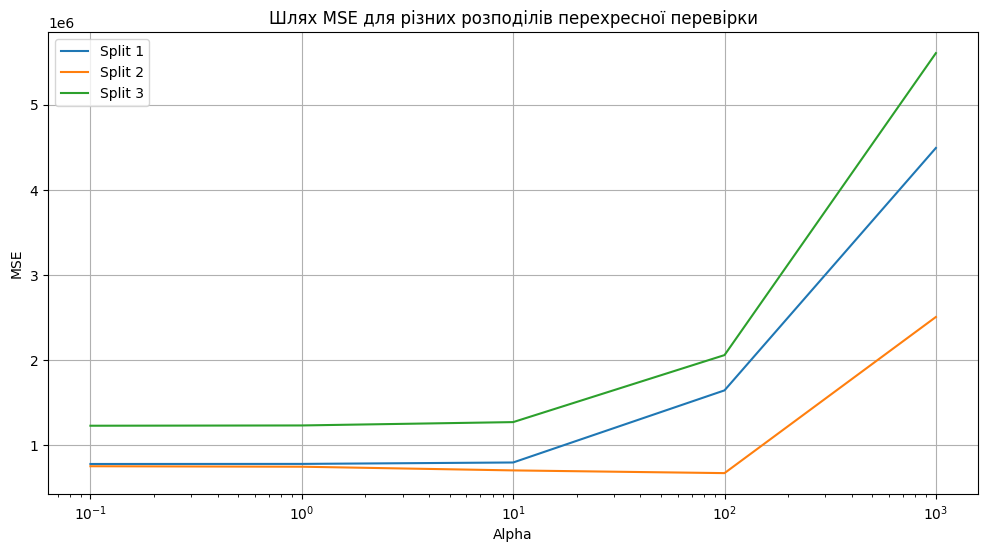

In [17]:
alphas = lasso_cv_regressor.alphas_
min_alpha_per_split = alphas[np.argmin(lasso_cv_regressor.mse_path_, axis=0)]
print("Значення alpha, що відповідають мінімумам MSE на кожному розбитті:")
for split, alpha in enumerate(min_alpha_per_split):
    print(f"Розбиття {split + 1}: {alpha}")
plt.figure(figsize=(12, 6))
for split, mse_values in enumerate(lasso_cv_regressor.mse_path_.T):
    plt.plot(alphas, mse_values, label=f"Split {split + 1}")
plt.title('Шлях MSE для різних розподілів перехресної перевірки')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

In [18]:
top_feature_indices = np.argsort(lasso_cv_coefs)[-4:][::-1]
top_features = [(feature_names[i], lasso_cv_coefs[i]) for i in top_feature_indices]
print("4 ознаки з найбільшими позитивними коефіцієнтами:")
for feature, coefficient in top_features:
    print(f"{feature}: {coefficient}")

4 ознаки з найбільшими позитивними коефіцієнтами:
yr: 2036.2316676979033
season: 506.55127864980744
workingday: 118.44759758668353
atemp: 69.91273749012187


yr (рік) - Чим вищий рік (2012), тим більше інтересу викликає прокат велосипедів серед людей.

atemp (температура по відчуттям) - Збільшення температури по відчуттям може призводити до зростання попиту на велосипеди, оскільки люди більше схильні взяти велосипеди при комфортних температурних умовах.

season (сезон) - Літо і весна (сезони 2 і 1) можуть позитивно впливати на кількість прокатів велосипедів порівняно з іншими сезонами.

temp (температура) - Збільшення температури також може призводити до збільшення попиту на велосипеди.

Щодо залежності cnt від цих ознак, можна спостерігати зростаючу лінійну залежність для деяких з цих ознак на раніше намальованих графіках. Наприклад, залежність від температури (temp) та температури по відчуттям (atemp) може бути лінійною, де більші значення цих ознак призводять до більшої кількості прокатів велосипедів. Залежність від сезону (season) може бути менш лінійною, але все ж показувати зростання кількості прокатів у літні та весняні місяці.

Загалом, здоровий глузд підказує, що при комфортних погодних умовах, вищій температурі, влітку і весною, із зростанням року, більше людей буде користуватися прокатом велосипедів.

In [19]:
top_negative_feature_indices = np.argsort(np.abs(lasso_cv_coefs))[:3]
top_negative_features = [(feature_names[i], lasso_cv_coefs[i]) for i in top_negative_feature_indices]
print("3 ознаки з найбільшими за модулем негативними коефіцієнтами:")
for feature, coefficient in top_negative_features:
    print(f"{feature}: {coefficient}")

3 ознаки з найбільшими за модулем негативними коефіцієнтами:
windspeed(ms): -0.0
hum: -10.352705204636582
mnth: -38.07827028932162


windspeed(mph) (швидкість вітру в милях на годину) - Зі збільшенням швидкості вітру може відбуватися зменшення кількості прокатів велосипедів, оскільки некомфортні погодні умови можуть призвести до меншої бажаності людей користуватися велосипедами.

weathersit (оцінка сприятливості погоди) - У випадку несприятливої погоди (висока оцінка), може відбуватися зменшення кількості прокатів велосипедів.

hum (вологість) - Зі збільшенням вологості може відбуватися зменшення кількості прокатів велосипедів, оскільки вологість також може впливати на комфорт катання.

На графіках можна помітити, що залежність cnt від цих ознак може бути не лінійною та зменшуватися зі збільшенням значень цих ознак. Це вполне логічно, оскільки негативний вплив погодних умов (швидкість вітру, оцінка сприятливості погоди та вологість) може привести до зменшення кількості прокатів велосипедів.

In [20]:
windspeed_ms = -0.0



У цьому лабораторному зайнятті я вивчав процес навчання лінійної регресії з використанням регуляризації Lasso та Ridge, на прикладі прогнозу кількості прокатів велосипедів.

Спочатку я ознайомився з даними про прокат велосипедів, провів їх візуалізацію та дослідив залежності між різними ознаками та цільовою змінною "кількість прокатів велосипедів" (cnt). Застосувавши лінійну регресію з L1-регуляризацією та L2-регуляризацією, я навчив моделі та аналізував ваги коефіцієнтів.

Для визначення оптимального значення параметра регуляризації (alpha) для моделі Lasso використовував крос-валідацію та метод LassoCV. Також визначив вплив різних ознак на кількість прокатів велосипедів, виявивши ті, які мають найбільший позитивний та негативний ефекти.

Важливо відзначити, що завдяки регуляризації L1 модель виключила ознаку "windspeed(ms)", оскільки вона була ідентичною до іншої ознаки та не додавала додаткової інформації.

Вцілому, ця робота допомогла мені краще зрозуміти процес навчання лінійної регресії з регуляризацією, відбір важливих ознак та оптимізацію моделі для прогнозування кількості прокатів велосипедів.